In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)

In [2]:
df_por = pd.read_pickle('df_por_modelling_range-G3-10_repaired-G3-0-values.pkl')

df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,Mjob_at_home,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_reputation,guardian_father,guardian_mother
0,1,1,18,1,1,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,6,1,0,0,0,0,0,0,1,1,0,0,0,1
1,1,1,17,1,1,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,6,1,0,0,0,0,1,0,0,1,0,0,1,0
2,1,1,15,1,0,1,1,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,6,1,0,0,0,0,1,0,0,0,0,0,0,1
3,1,1,15,1,1,1,4,2,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,7,0,0,0,0,0,0,1,0,0,1,0,0,1
4,1,1,16,1,1,1,3,3,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,7,0,1,0,0,0,1,0,0,0,1,0,1,0


## PCA 

In [3]:
X = np.array(df_por.drop('G3',axis = 1))

In [4]:
sc = StandardScaler()
sc.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [5]:
X = sc.transform(X)

X

array([[ 0.73094388,  0.83337685,  1.03169516, ..., -0.53160953,
        -0.55539872,  0.65297291],
       [ 0.73094388,  0.83337685,  0.21013668, ..., -0.53160953,
         1.80050828, -1.53145709],
       [ 0.73094388,  0.83337685, -1.43298028, ..., -0.53160953,
        -0.55539872,  0.65297291],
       ...,
       [-1.36809408,  0.83337685,  1.03169516, ..., -0.53160953,
        -0.55539872,  0.65297291],
       [-1.36809408, -1.19993734,  0.21013668, ..., -0.53160953,
        -0.55539872,  0.65297291],
       [-1.36809408, -1.19993734,  1.03169516, ..., -0.53160953,
        -0.55539872,  0.65297291]])

In [6]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

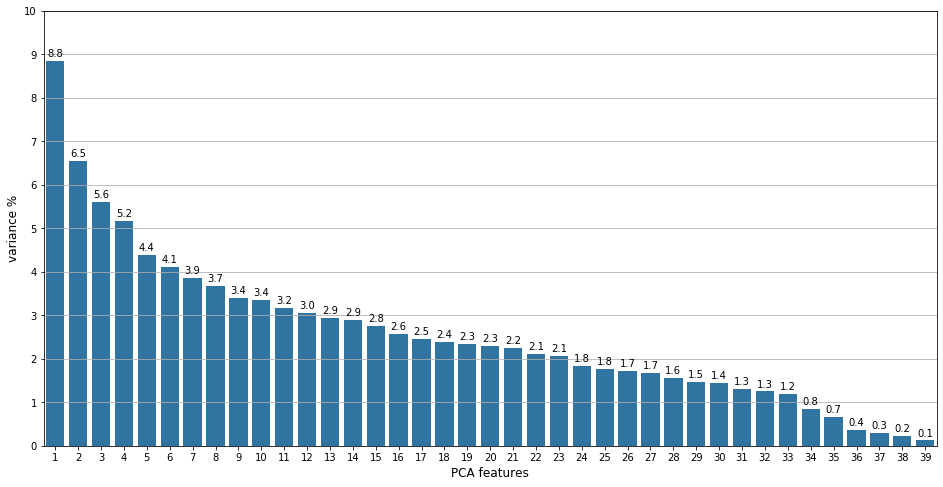

In [7]:
plt.figure(figsize = (16,8))
ax = sns.barplot(list(range(1 ,pca.n_components_ + 1)),pca.explained_variance_ratio_ * 100,color = '#1f77b4')
plt.yticks(np.arange(0,11,1))
plt.ylim(0,10)
ax.yaxis.grid(True)
plt.xlabel('PCA features',fontsize = 12)
plt.ylabel('variance %',fontsize = 12)

for rect,label in zip(ax.patches,np.around(pca.explained_variance_ratio_ * 100,1)):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2,height + 0.05,label,ha = 'center',va = 'bottom');

## KMeans

In [8]:
df_por_pca = pd.DataFrame(pca.transform(X))

df_por_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
0,-1.064655,-1.386065,0.424267,-2.515213,0.016725,2.550320,0.023941,-0.685586,1.902249,-0.005144,-0.804368,2.172631,1.271009,-0.234173,2.676208,0.886802,2.122329,-1.075100,0.559023,-0.000366,2.741512,-2.076293,-1.487494,0.153291,0.128048,0.195611,-0.387753,-0.515510,-0.792826,-0.025612,0.528988,-0.728186,-0.370668,0.542345,0.882501,-0.212962,-0.207432,-0.117560,-0.014002
1,1.364652,-1.695483,1.176100,1.072754,-0.282115,0.506349,0.590997,1.787064,0.650971,-0.198266,0.282317,-1.457431,0.678914,-2.907880,-0.003088,-0.325836,-0.070842,1.627198,0.241437,-1.095176,0.571739,-0.265733,-0.577111,0.290915,0.192902,-0.095116,-0.031064,-0.137630,0.056590,1.119121,0.447159,0.039175,-0.396784,0.375247,-0.036668,0.061341,-0.282591,-0.009217,0.028146
2,0.647821,-1.250520,-1.037277,0.008701,0.819222,-0.826050,-2.024283,0.361661,1.775373,-0.092571,0.405408,0.264489,1.532303,-1.736230,-0.491103,0.465128,1.656504,-0.776056,0.880257,0.456134,0.779867,1.794592,-1.689929,-0.147260,0.096685,0.066588,-0.194976,0.928095,0.090303,0.662172,-1.009224,-0.040994,0.591161,-0.089268,0.204691,1.003719,0.370196,-0.118349,-0.085395
3,-2.336449,-1.544932,0.498809,-0.487398,1.655443,0.051133,-0.885145,0.536834,-1.446241,1.242683,0.558329,-0.710508,-0.660324,0.050670,-0.728438,1.528791,-0.316885,-0.489221,-0.131293,0.687763,-0.673234,0.670444,1.697365,0.306856,0.009674,0.307264,0.114888,-0.883118,-0.484776,-0.813814,-0.424619,0.739817,0.331573,0.888384,0.844131,-0.148465,0.159961,0.656670,-0.382988
4,-0.660859,-1.891808,0.150075,2.696249,-0.681085,1.602953,-1.053221,0.905195,0.622334,0.183929,0.519090,-0.590905,-0.216624,0.150420,0.324168,-0.336094,0.526836,-0.059950,-1.283947,0.195613,-0.151617,-0.674455,2.020244,-0.006293,-0.114023,-0.238040,0.707090,0.271444,0.352965,-0.155560,0.669852,0.219407,0.867804,-0.294847,0.284602,-0.047915,-0.072976,-0.255362,-0.040759


In [9]:
df_por_pca.shape

(649, 39)

In [10]:
clusters = range(1,10)
inertias = []

for k in clusters:
    model = KMeans(n_clusters = k)
    model.fit(df_por_pca.iloc[:,:4])
    inertias.append(model.inertia_)

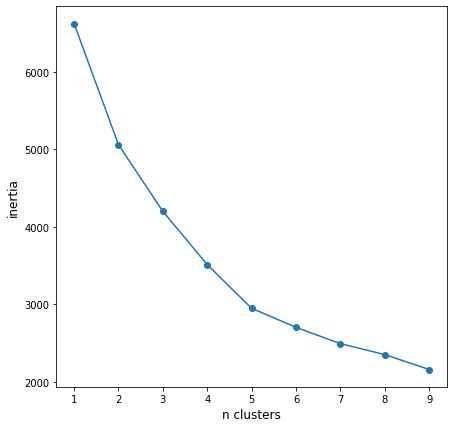

In [11]:
plt.figure(figsize = (7,7))
plt.plot(clusters,inertias,'-o')
plt.xlabel('n clusters',fontsize = 12)
plt.ylabel('inertia',fontsize = 12)
plt.xticks(clusters);

In [12]:
model = KMeans(n_clusters = 5,random_state = 42)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [13]:
y_kmeans = model.predict(X)

In [14]:
y_kmeans = pd.DataFrame(y_kmeans)

y_kmeans.columns = ['cluster']

In [15]:
df_por = pd.concat([df_por,y_kmeans],axis = 1)

df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,Mjob_at_home,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_reputation,guardian_father,guardian_mother,cluster
0,1,1,18,1,1,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,6,1,0,0,0,0,0,0,1,1,0,0,0,1,1
1,1,1,17,1,1,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,6,1,0,0,0,0,1,0,0,1,0,0,1,0,2
2,1,1,15,1,0,1,1,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,6,1,0,0,0,0,1,0,0,0,0,0,0,1,3
3,1,1,15,1,1,1,4,2,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,7,0,0,0,0,0,0,1,0,0,1,0,0,1,1
4,1,1,16,1,1,1,3,3,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,7,0,1,0,0,0,1,0,0,0,1,0,1,0,2


In [16]:
df_por['cluster'].value_counts().sort_index()

0     85
1    212
2    121
3    158
4     73
Name: cluster, dtype: int64

In [17]:
df_por_cluster_0 = df_por[df_por['cluster'] == 0]

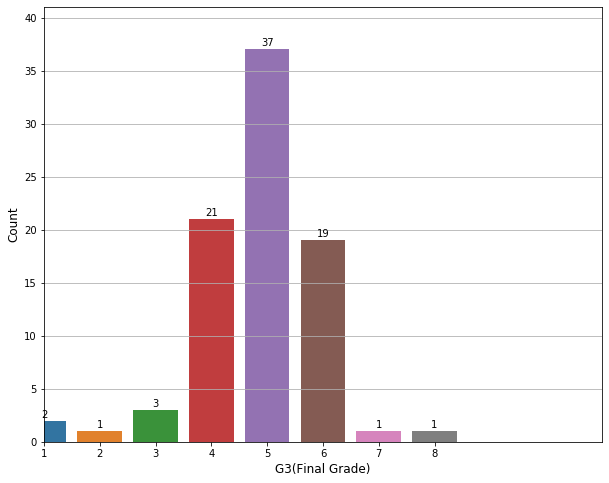

In [18]:
plt.figure(figsize = (10,8))
ax = sns.countplot(df_por_cluster_0['G3'])
plt.yticks(np.arange(0,41,5))
plt.xlim(0,10)
plt.ylim(0,41)
ax.yaxis.grid(True)
plt.xlabel('G3(Final Grade)',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,p.get_height() + 0.3,p.get_height(),ha = 'center')

In [19]:
round(df_por_cluster_0['G3'].value_counts(normalize = True).sort_values(ascending = False),2).head(3)

5    0.44
4    0.25
6    0.22
Name: G3, dtype: float64

In [20]:
df_por_cluster_1 = df_por[df_por['cluster'] == 1]

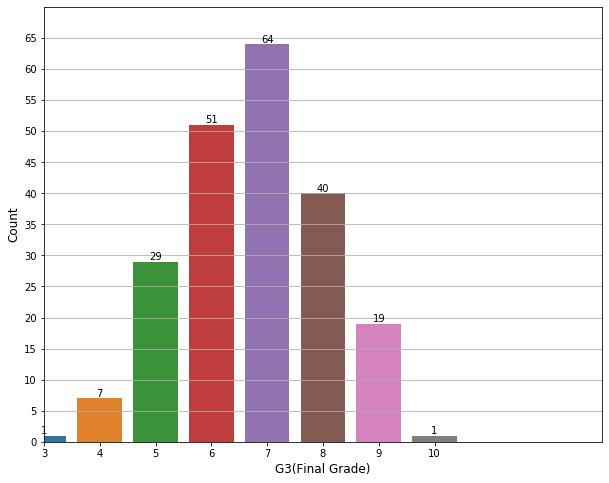

In [21]:
plt.figure(figsize = (10,8))
ax = sns.countplot(df_por_cluster_1['G3'])
plt.yticks(np.arange(0,70,5))
plt.xlim(0,10)
plt.ylim(0,70)
ax.yaxis.grid(True)
plt.xlabel('G3(Final Grade)',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,p.get_height() + 0.3,p.get_height(),ha = 'center')

In [22]:
round(df_por_cluster_1['G3'].value_counts(normalize = True).sort_values(ascending = False),2).head(3)

7    0.30
6    0.24
8    0.19
Name: G3, dtype: float64

In [23]:
df_por_cluster_2 = df_por[df_por['cluster'] == 2]

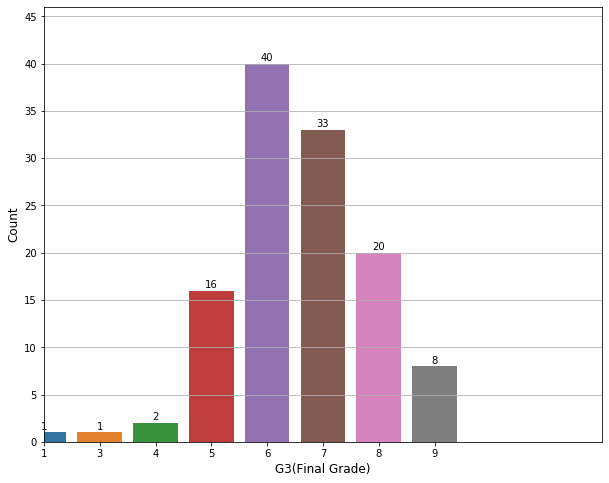

In [24]:
plt.figure(figsize = (10,8))
ax = sns.countplot(df_por_cluster_2['G3'])
plt.yticks(np.arange(0,46,5))
plt.xlim(0,10)
plt.ylim(0,46)
ax.yaxis.grid(True)
plt.xlabel('G3(Final Grade)',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,p.get_height() + 0.3,p.get_height(),ha = 'center')

In [25]:
round(df_por_cluster_2['G3'].value_counts(normalize = True).sort_values(ascending = False),2).head(3)

6    0.33
7    0.27
8    0.17
Name: G3, dtype: float64

In [26]:
df_por_cluster_3 = df_por[df_por['cluster'] == 3]

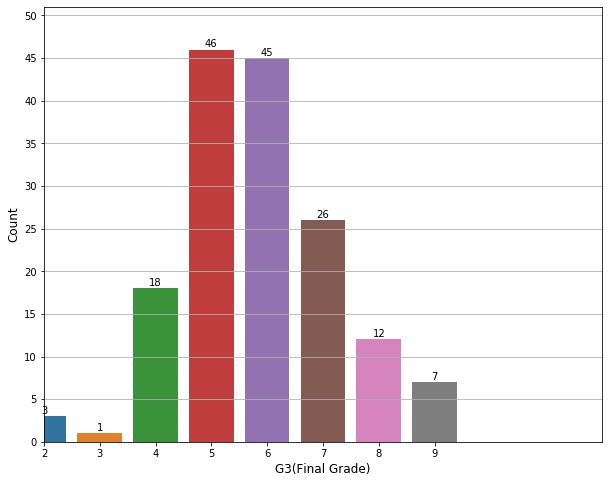

In [27]:
plt.figure(figsize = (10,8))
ax = sns.countplot(df_por_cluster_3['G3'])
plt.yticks(np.arange(0,51,5))
plt.xlim(0,10)
plt.ylim(0,51)
ax.yaxis.grid(True)
plt.xlabel('G3(Final Grade)',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,p.get_height() + 0.3,p.get_height(),ha = 'center')

In [28]:
round(df_por_cluster_3['G3'].value_counts(normalize = True).sort_values(ascending = False),2).head(3)

5    0.29
6    0.28
7    0.16
Name: G3, dtype: float64

In [29]:
df_por_cluster_4 = df_por[df_por['cluster'] == 4]

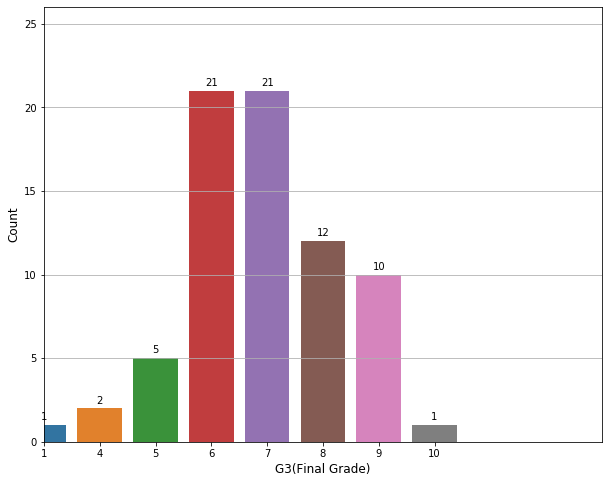

In [30]:
plt.figure(figsize = (10,8))
ax = sns.countplot(df_por_cluster_4['G3'])
plt.yticks(np.arange(0,26,5))
plt.xlim(0,10)
plt.ylim(0,26)
ax.yaxis.grid(True)
plt.xlabel('G3(Final Grade)',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,p.get_height() + 0.3,p.get_height(),ha = 'center')

In [31]:
round(df_por_cluster_4['G3'].value_counts(normalize = True).sort_values(ascending = False),2).head(3)

6    0.29
7    0.29
8    0.16
Name: G3, dtype: float64